<a href="https://colab.research.google.com/github/miller00315/ia_studies/blob/main/introduction_to_computer_vision_with_tensor_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convulotional Neurla Network and Computer Vision with TensorFlow

Computer vision is the practice of writing algorihitms which can discover patterns in visual data. Such as the camera of a self-driving car recogninzing the car in front.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import zipfile

## Get the data

The image we're working with are from the Food101 dataset (101 fierent classes of food).

However we've modified it to only use two classes (pizza 🍕 & steak 🐄) using the image data modification notebook.

> 🔑 **Note:** We start with a smaller dataset so we can expiriment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [2]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-05-12 21:59:30--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.207, 74.125.197.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   184MB/s    in 0.6s    

2024-05-12 21:59:30 (184 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspecting the data (become one with it)

A very cuccial step ate teh begining of any machine learning project is becoming one with the data.

And for a computer vision project.. this usually means visualizing many samples of our data.

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [4]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [11]:
# The extra file in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 May 12 17:01 .
drwxr-xr-x 1 root root 4096 May 12 17:03 ..
drwxr-xr-x 4 root root 4096 May 12 17:01 test
drwxr-xr-x 4 root root 4096 May 12 17:01 train


In [5]:
# Another way to find out how many images are in a file

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [6]:
# Get the class name programamtically

import pathlib
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # create a list of classes names from subdirectories
print(class_names)

['pizza' 'steak']


In [7]:
# Let's visualize our images
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['598381.jpg']
Image shape: (306, 512, 3)


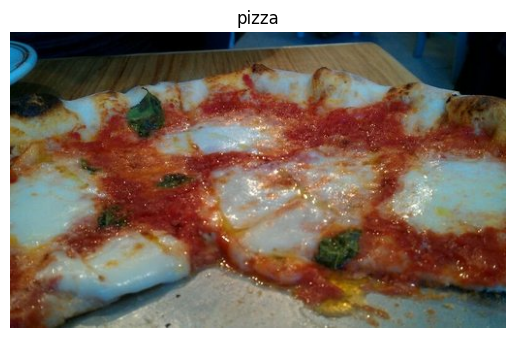

In [8]:
# View a random image from the training dataset

img = view_random_image(target_dir="pizza_steak/train/",
                 target_class=random.choice(class_names))

In [10]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values

tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[73, 64, 65],
        [74, 65, 66],
        [74, 65, 66],
        ...,
        [43,  4,  5],
        [43,  4,  5],
        [43,  4,  5]],

       [[71, 62, 63],
        [72, 63, 64],
        [72, 63, 64],
        ...,
        [43,  4,  5],
        [43,  4,  5],
        [43,  4,  5]],

       [[71, 62, 63],
        [71, 62, 63],
        [71, 62, 63],
        ...,
        [43,  4,  5],
        [43,  4,  5],
        [43,  4,  5]],

       ...,

       [[28, 14, 13],
        [37, 22, 19],
        [45, 30, 27],
        ...,
        [13, 11, 12],
        [14, 12, 13],
        [14, 12, 13]],

       [[22, 10, 10],
        [22, 10, 10],
        [25, 11, 11],
        ...,
        [12, 10, 11],
        [12, 10, 11],
        [12, 10, 11]],

       [[27, 17, 18],
        [26, 16, 17],
        [29, 15, 15],
        ...,
        [11,  9, 10],
        [11,  9, 10],
        [11,  9, 10]]], dtype=uint8)>

In [11]:
# View the miage shape

img.shape # return width, height, colour channels

(512, 512, 3)

In [12]:
# Get all the pixels values between zero and 1

img / 255.

array([[[0.28627451, 0.25098039, 0.25490196],
        [0.29019608, 0.25490196, 0.25882353],
        [0.29019608, 0.25490196, 0.25882353],
        ...,
        [0.16862745, 0.01568627, 0.01960784],
        [0.16862745, 0.01568627, 0.01960784],
        [0.16862745, 0.01568627, 0.01960784]],

       [[0.27843137, 0.24313725, 0.24705882],
        [0.28235294, 0.24705882, 0.25098039],
        [0.28235294, 0.24705882, 0.25098039],
        ...,
        [0.16862745, 0.01568627, 0.01960784],
        [0.16862745, 0.01568627, 0.01960784],
        [0.16862745, 0.01568627, 0.01960784]],

       [[0.27843137, 0.24313725, 0.24705882],
        [0.27843137, 0.24313725, 0.24705882],
        [0.27843137, 0.24313725, 0.24705882],
        ...,
        [0.16862745, 0.01568627, 0.01960784],
        [0.16862745, 0.01568627, 0.01960784],
        [0.16862745, 0.01568627, 0.01960784]],

       ...,

       [[0.10980392, 0.05490196, 0.05098039],
        [0.14509804, 0.08627451, 0.0745098 ],
        [0.17647059, 0

## An end-to-end example

Let's build a convolutional neural network to find paterns in our images, more specifically we a need way to:

* Load our images
* prepocess our images
* Build a CMM to find patterns in our images
* Compile our CNN
* Fit CNN to our training data

[Polo club](https://poloclub.github.io/cnn-explainer/)

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed

tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1, also called scalling/normalization )
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and validation directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # binary labels
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [10]:
# Build a CNN model (same as Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          strides=1,
                          activation="relu",
                          input_shape=(224, 224, 3)
                         ),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
 ])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit our CNN
model_1_history =  model_1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 15s 183ms/step - loss: 0.5662 - accuracy: 0.7067 - val_loss: 0.4465 - val_accuracy: 0.8040
Epoch 2/5
47/47 [==============================] - 5s 115ms/step - loss: 0.4447 - accuracy: 0.7927 - val_loss: 0.3592 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 6s 134ms/step - loss: 0.4163 - accuracy: 0.8207 - val_loss: 0.3520 - val_accuracy: 0.8500
Epoch 4/5
47/47 [==============================] - 6s 118ms/step - loss: 0.3773 - accuracy: 0.8373 - val_loss: 0.3291 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 5s 113ms/step - loss: 0.3590 - accuracy: 0.8360 - val_loss: 0.3540 - val_accuracy: 0.8380


> 🔑 **Note:** if the above cell is taking more than ~10 seconds per epoch, make sure you're using a GPU by going to Runtime -> Change Runtime type -> Hadware aceleration -> GPU

In [11]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

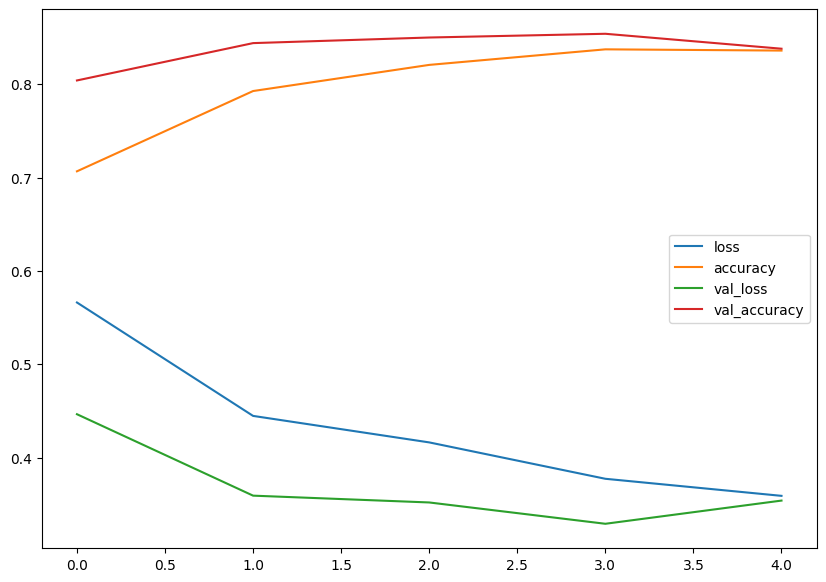

In [12]:
import pandas as pd

# Plot the loss curves
pd.DataFrame(model_1_history.history).plot(figsize=(10, 7))
plt.show()

In [19]:
model_1.evaluate(valid_data)

16/16 [==============================] - 1s 82ms/step - loss: 0.3686 - accuracy: 0.8560


[0.36863604187965393, 0.8560000061988831]

##Using the same model as before

Let's replicate the model we've built in the previous section to see if it works with our image data.

The model we're building is from the tensor flow playground:



In [23]:
# Set random seed
tf.random.set_seed(42)

# Create a model to teplicate the Tensoflow playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fite the model
model_2_history = model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 119ms/step - loss: 0.9722 - accuracy: 0.4913 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 7s 145ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 108ms/step - loss: 0.6932 - accuracy: 0.4640 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 127ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 5s 108ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [15]:
model_2.evaluate(valid_data)

16/16 [==============================] - 2s 101ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931476593017578, 0.5]

In [16]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more aprameters than our CNN,model_2 perfrom terribly.. let's try imporve it...

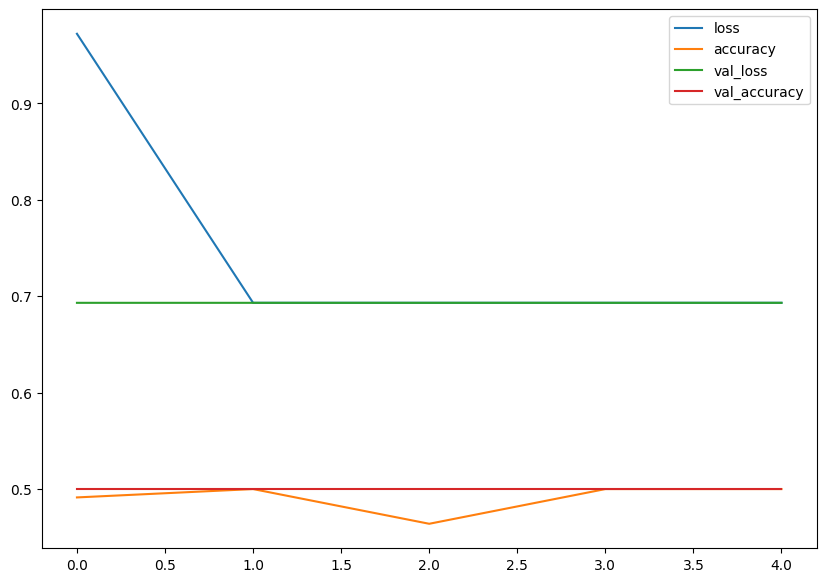

In [24]:
pd.DataFrame(model_2_history.history).plot(figsize=(10, 7))
plt.show()

In [17]:
# Set random seed
tf.random.set_seed(42)

# Create teh model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(
  loss="binary_crossentropy",
  optimizer=tf.keras.optimizers.Adam(),
  metrics=["accuracy"]
)

# Fit the model
history_3 = model_3.fit(
  train_data,
  epochs=5,
  steps_per_epoch=len(train_data),
  validation_data=valid_data,
  validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 7s 118ms/step - loss: 2.4610 - accuracy: 0.6620 - val_loss: 1.1280 - val_accuracy: 0.6540
Epoch 2/5
47/47 [==============================] - 5s 111ms/step - loss: 0.7214 - accuracy: 0.7153 - val_loss: 0.4923 - val_accuracy: 0.7780
Epoch 3/5
47/47 [==============================] - 6s 126ms/step - loss: 0.8231 - accuracy: 0.6973 - val_loss: 0.5248 - val_accuracy: 0.7820
Epoch 4/5
47/47 [==============================] - 6s 124ms/step - loss: 0.5382 - accuracy: 0.7700 - val_loss: 0.8342 - val_accuracy: 0.7080
Epoch 5/5
47/47 [==============================] - 5s 111ms/step - loss: 0.5564 - accuracy: 0.7647 - val_loss: 0.4274 - val_accuracy: 0.7960


In [18]:
model_3.evaluate(valid_data)

16/16 [==============================] - 1s 81ms/step - loss: 0.4274 - accuracy: 0.7960


[0.42740970849990845, 0.7960000038146973]

In [19]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


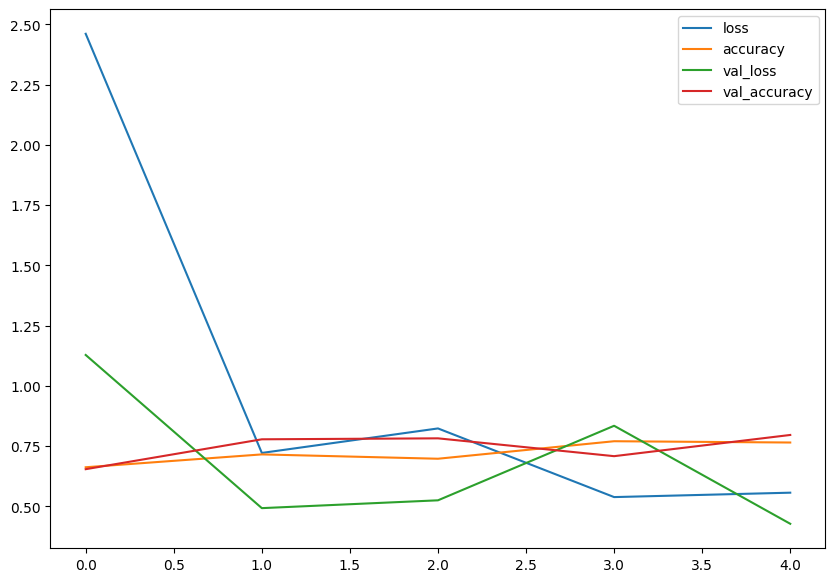

In [20]:
pd.DataFrame(history_3.history).plot(figsize=(10, 7))
plt.show()

## Binary clasification: Let's break it down

1. Become one with the data (Visualize, Visualize, Visualize)
2. Preprocess the dta (prepared if for our model, the main step here scalling/normalizing and turning our data into batches)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust parameters and improve the model (try to bear outr baseline)
7. Repeat until satified

### 1. Become one with the data

['2032669.jpg']
Image shape: (289, 512, 3)
['1390308.jpg']
Image shape: (384, 512, 3)


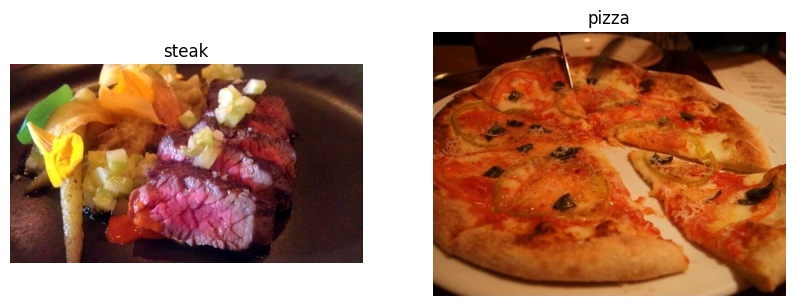

In [26]:
# Visualize data

plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
steake_img = view_random_image("pizza_steak/train/", "steak")

plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [ ]:
## Define dicrectory data set paths

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"



Our next steps is to turn our dta into **batches**.

A batch is a small subset of data. Rather than look at all ~10,000 images at a time , amodel might only look at 32 at a time.

It does this for a couple of reasons:

1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. trying to learn teh patterns in 10,0000 images in one hit could result in the model no being able to learn very well.

Why 32?

Because 32 is good for your health...

In [27]:
!nvidia-smi

Sun May 12 23:11:03 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P0              27W /  70W |   1665MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [28]:
# Create train and test data generator and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)



In [29]:
# Load in our image data from directories and turn them into batches

train_data = train_datagen.flow_from_directory(train_dir,# Target directory of images
                                               batch_size=32, # Size of minibatches
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode="binary", # type of data you're working with
                                               seed=42) # size of minibatches

valid_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [30]:
# get a sample of a train data batch
images, labels = train_data.next() # get the "next" batch of images/labes
len(images), len(labels)

(32, 32)

In [31]:
len(train_data)

47

In [32]:
# Get the first two images

images[:2], images[0].shape

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.3137255 , 0.32941177, 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34509805, 0.3803922 ],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.38431376],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.3647059 , 0.40000004, 0.29411766],
          [0.38823533, 0.42352945, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.30980393],
          [0.30980393, 0.29803923, 0.2784314 ],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [33]:
images[7].shape

(224, 224, 3)

In [ ]:
# View the first batch of labels

In [34]:
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model existing result that you setup whem begining a machine learning experiment, you try to beat the baseline.

> 🔑 **Note:** In deep learning, there is almost an infinite amount od architectures you could create. So one of the best ways to get start with something simple and see if it works on your dta and then introduce complexity as required (e.g. look at which curent model is performing best in the field for your problem)

[Papers with code](https://paperswithcode.com/sota)

In [35]:
# Make the creating our model a littel esasier

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras.models import Sequential

In [39]:
# Create the mdoel (this will be our baseline, a layer concolutional neural network)

model_4 = Sequential([
  Conv2D(filters=10,# filter is the number of sliding windows going across an input (higher = most compress model)
         kernel_size=(3, 3), # the size of sliding window going across an input
         strides=1, # the size of the step the sliding window takes across an input
         padding="valid", # if "same", output shape is same as input shape, if "valid", output shape gets compressed
         activation="relu",
         input_shape=(224, 224, 3)), # input layer specify input shape
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid") # output layer (working wth binary clssification so only 1 output neuron)
])


model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 121ms/step - loss: 0.8256 - accuracy: 0.6940 - val_loss: 0.4437 - val_accuracy: 0.7940
Epoch 2/5
47/47 [==============================] - 6s 118ms/step - loss: 0.4133 - accuracy: 0.8233 - val_loss: 0.4654 - val_accuracy: 0.7860
Epoch 3/5
47/47 [==============================] - 6s 124ms/step - loss: 0.3196 - accuracy: 0.8693 - val_loss: 0.3324 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 6s 137ms/step - loss: 0.1826 - accuracy: 0.9313 - val_loss: 0.3621 - val_accuracy: 0.8420
Epoch 5/5
47/47 [==============================] - 6s 133ms/step - loss: 0.0831 - accuracy: 0.9813 - val_loss: 0.3520 - val_accuracy: 0.8480


https://poloclub.github.io/cnn-explainer/

In [40]:
model_4.evaluate(valid_data)

16/16 [==============================] - 1s 85ms/step - loss: 0.3520 - accuracy: 0.8480


[0.35202059149742126, 0.8479999899864197]

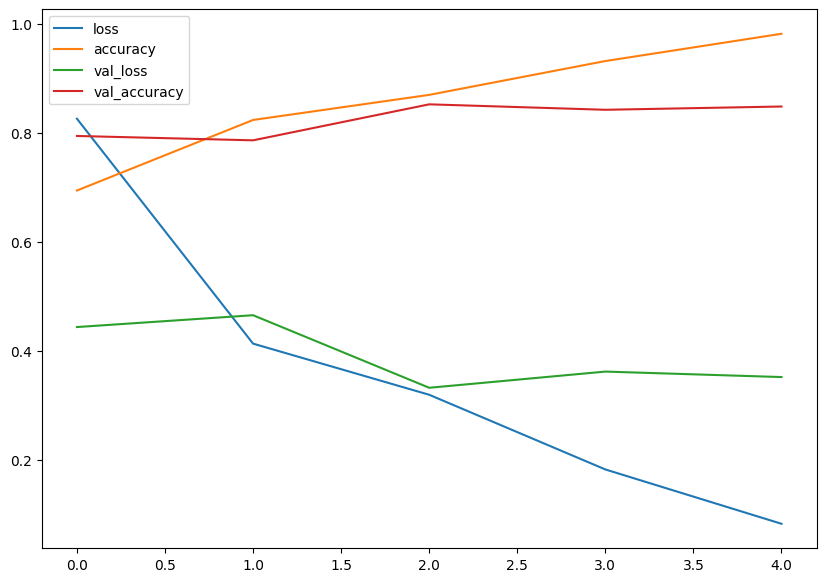

In [41]:
pd.DataFrame(history_4.history).plot(figsize=(10, 7))
plt.show()